In [1]:
import os
os.getcwd()

'C:\\code\\jupyter_notebooks\\AI practice\\AI Projects'

In [2]:
os.chdir("C:/code/jupyter_notebooks/datasets/sentiment_detection")

In [3]:
os.getcwd()

'C:\\code\\jupyter_notebooks\\datasets\\sentiment_detection'

In [4]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
data = pd.read_csv('Training_Reddit_Data.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [7]:
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [8]:
df1 = data[data.isna().any(axis=1)]

In [9]:
df1

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


**Removing null values of comments, as they won't be useful in training**

In [10]:
data =data.dropna()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37149 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37149 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 870.7+ KB


**Now, data has no  null values**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37149 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37149 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 870.7+ KB


In [13]:
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


**Creating input for the learning model**

**Splitting the data**

In [14]:
# Splitting dataset into training and testing set
X = data['clean_comment']
y = data['category']

In [15]:
X.head()

0     family mormon have never tried explain them t...
1    buddhism has very much lot compatible with chr...
2    seriously don say thing first all they won get...
3    what you have learned yours and only yours wha...
4    for your own benefit you may want read living ...
Name: clean_comment, dtype: object

In [16]:
y.head()

0    1
1    1
2   -1
3    0
4    1
Name: category, dtype: int64

In [17]:
train_size = 22290
X_train = X[0:train_size]
y_train = y[0:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

In [18]:
X_train.shape

(22290,)

In [19]:
X_test.shape

(14859,)

**Training Data exploration**

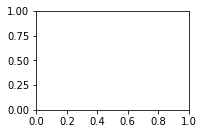

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1= fig.add_subplot(221)

In [21]:
y_train.value_counts().plot(kind ='bar', ax=ax1)

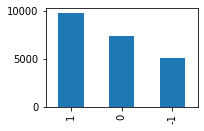

In [22]:
fig

In [23]:
y_train.value_counts()

 1    9821
 0    7341
-1    5128
Name: category, dtype: int64

**Defining model**

In [24]:
#hyperparameter
vocab_size = 60000
oov_tok = "<OOV>"
embedding_dim = 16
max_length = 300
trunc_type='post'
num_epochs = 20

In [25]:

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#TRAINING SET
#Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
#Padding of the sequences
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, truncating=trunc_type)

#TEST SET
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length)

In [26]:
X_train_padded[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,  1970,    22,    73,    80,
          72, 10551,    12,  2564,   463,  1150,     4,  7446,     3,
        2262,     8,   375,     2,    33,    85,  2262,  1932,  2786,
         112,   991,

**Defining model**

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 16)           960000    
_________________________________________________________________
flatten (Flatten)            (None, 4800)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 28806     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 988,813
Trainable params: 988,813
Non-trainable params: 0
_________________________________________________________________


In [28]:
X_train = X_train_padded
X_test = X_test_padded
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))

Train on 22290 samples, validate on 14859 samples
Epoch 1/20
22290/22290 [==============================] - 23s 1ms/sample - loss: 0.4080 - accuracy: 0.3452 - val_loss: 0.0339 - val_accuracy: 0.4861
Epoch 2/20
22290/22290 [==============================] - 22s 1ms/sample - loss: -4.2168 - accuracy: 0.5319 - val_loss: -7.2935 - val_accuracy: 0.5292
Epoch 3/20
22290/22290 [==============================] - 24s 1ms/sample - loss: -32.7865 - accuracy: 0.5436 - val_loss: -33.9398 - val_accuracy: 0.5554
Epoch 4/20
22290/22290 [==============================] - 19s 865us/sample - loss: -104.5274 - accuracy: 0.5423 - val_loss: -85.3419 - val_accuracy: 0.5575
Epoch 5/20
22290/22290 [==============================] - 19s 862us/sample - loss: -229.0530 - accuracy: 0.5470 - val_loss: -162.7162 - val_accuracy: 0.5512
Epoch 6/20
22290/22290 [==============================] - 21s 927us/sample - loss: -413.9705 - accuracy: 0.5472 - val_loss: -268.4236 - val_accuracy: 0.5315
Epoch 7/20
22290/22290 [===

In [29]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(60000, 16)


In [30]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

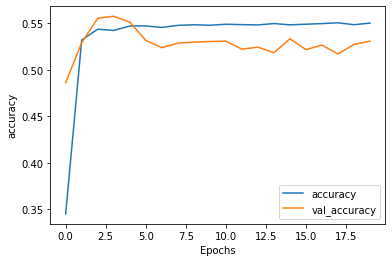

In [31]:
plot_graphs(history, 'accuracy')

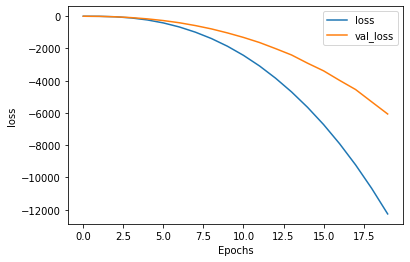

In [32]:
plot_graphs(history, 'loss')

In [33]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_train)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

ValueError: multiclass format is not supported